In [20]:
import numpy as np
import pandas as pd
from collections import Counter
from keras.datasets import mnist

from matplotlib import pyplot
import matplotlib.pyplot as plt

# Loading data
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
img_before_binarize = np.array(train_X[0])

In [21]:
# Size of grid to split the image into
x_grid_size = 4
y_grid_size = 4

def slice_array(data, x_size, y_size):
  # Todo make sure we can split the data correctly without raising an error
  ystep = data.shape[0] // x_size
  xstep = data.shape[1] // y_size
  temp = []
  for i in range(0, data.shape[0], ystep):
    for j in range(0, data.shape[1], xstep):
      arr = np.array(data[i:i+ystep, j:j+xstep])
      temp.append(arr)
  return np.array(temp)

In [22]:
def centroid(image):
    cen_sum = image.sum()
    if cen_sum == 0:
        return 0, 0
    
    x_sum = y_sum = 0
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            x_sum += x * image[y][x]
            y_sum += y * image[y][x]
    
    centroid_x = x_sum / cen_sum
    centroid_y = y_sum / cen_sum
    return centroid_x, centroid_y

def transform_feature(data):
    # Data is N x 28 x 28
    centroids = []
    for i in range(data.shape[0]):
    # Each sample
        sliced = slice_array(data[i],x_grid_size, y_grid_size)
        local_centroids = []
        for im in sliced:
            x,y = centroid(im)
            local_centroids.extend([x,y])
        centroids.append(local_centroids)
    return np.array(centroids)

In [23]:
threshold = 1

def biniarize_data(a):
    a[a >= threshold] = 1
    a[a < threshold] = 0

biniarize_data(train_X)
biniarize_data(test_X)
test_X = transform_feature(test_X)

In [24]:
class KNN:
    def __init__(self, k):
        self.train_X = None
        self.train_Y = None
        self.k = k

    def fit(self, train_X, train_Y):
        self.train_X = train_X
        self.train_Y = train_Y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.sum( (_x - x) ** 2) for _x in self.train_X]
        k_closest = np.argsort(distances)[:self.k]
        labels = [self.train_Y[i] for i in k_closest]
        return Counter(labels).most_common(1)[0][0]

In [25]:
n = 10000
idx = np.random.choice(np.arange(train_X.shape[0]), size=n)
sample_train_X, sample_train_Y = train_X[idx] , train_Y[idx]
sample_train_X = transform_feature(sample_train_X)

In [26]:
my_model = KNN(4)
my_model.fit(sample_train_X, sample_train_Y)
preds = my_model.predict(test_X)

In [27]:
my_accuracy = np.sum(preds == test_Y) / len(test_Y)
print("My KNN classifier acuucracy: ", my_accuracy*100)

My KNN classifier acuucracy:  84.98


Text(0.5, 0, 'Before Binarizing')

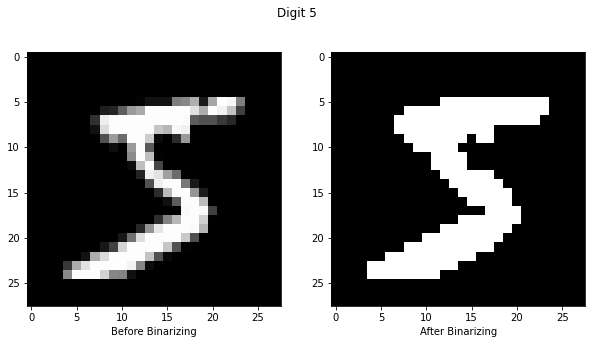

In [17]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("Digit 5")
plt.subplot(1,2, 2)
plt.imshow(train_X[0], cmap="gray")
plt.xlabel("After Binarizing")
plt.subplot(1,2, 1)
plt.imshow(img_before_binarize, cmap="gray")
plt.xlabel("Before Binarizing")

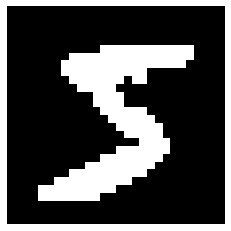

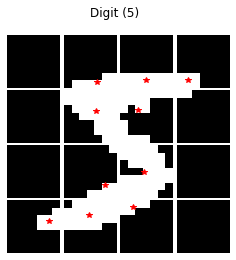

In [18]:
# Plotting an example
plt.figure(figsize = (4,4))
plt.imshow(train_X[0], cmap="gray")
plt.axis('off')

# Plotting an example from our data after transforming the data
# A visualization of how the centroid is calculated for each batch of the image
def split_and_show(n, x_size, y_size):
    fig = plt.figure(figsize = (4,4))
    img = slice_array(train_X[n],x_size,y_size)
    for i in range(x_size*y_size):
        plt.subplot(x_size,y_size,i+1)
        x, y = centroid(img[i])
        if x != 0 and y != 0:
            plt.plot(x,y, 'r*')
        plt.imshow(img[i], cmap="gray")
        plt.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    fig.suptitle("Digit ({})".format(train_Y[n]))
    
split_and_show(0,4,4)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def build_model(k):
    train_X_trans = transform_feature(train_X)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X_trans,train_Y)
    return model

model = build_model(5)

In [29]:
predicted = model.predict(test_X)
accuracy = accuracy_score(test_Y, predicted)
print(accuracy*100)

90.52


# Performance Summary
Pre-calulcated performance of different built models

In [55]:
model_results = pd.read_csv("results.csv")
hist_10k = model_results[model_results.n == 10000]
hist_20k = model_results[model_results.n == 20000]
hist_60k = model_results[model_results.n == 60000]

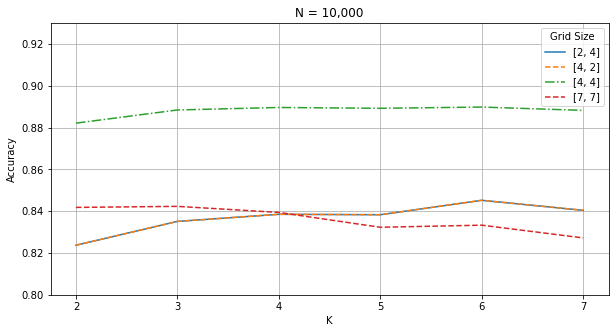

In [56]:
grid = ["[2, 4]", "[4, 2]", "[4, 4]", "[7, 7]"]
data = hist_10k

plt.figure(figsize=(10,5))
plt.ylim([0.80,0.93])

c = 1
for i in grid:
    tmp = data[data.grid == i]
    ls=['--','solid','dashed','-.'][c%4]
    plt.plot(tmp.K, tmp.Acc, linestyle=ls, label=i)
    c += 1

plt.ylabel("Accuracy")
plt.xlabel("K")
plt.title("N = 10,000")
plt.grid()
plt.legend(loc=0,title="Grid Size")

In [57]:
max_acc = []
max_acc.append(hist_10k.loc[hist_10k.Acc.idxmax()])
max_acc.append(hist_20k.loc[hist_20k.Acc.idxmax()])
max_acc.append(hist_60k.loc[hist_60k.Acc.idxmax()])

print("Max accuracy for different N")
for i in max_acc:
    print(i.to_string() + "\n")

Max accuracy for different N
n        10000
grid    [4, 4]
K            6
Acc     0.8898

n        20000
grid    [4, 4]
K            5
Acc     0.9025

n        60000
grid    [4, 4]
K            6
Acc     0.9141

